# Part 1:
Our first goal is to explore the dataset and prepare it for modeling. 

### Libraries

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from statistics import mean

%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Dataset
We begin by importing the 'train' and 'test' sets.

In [140]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Examine 'Train'
How big is our 'train' set and what sort of information does it contain?
- 42,000 rows of 785 features
- "label" is the *target*, unique to the 'train' set
- goal is to classify digits 0-9
- 784 pixels per image contain value representing contrast with background (0)

In [141]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [142]:
train.shape

(42000, 785)

In [143]:
train.label.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [144]:
train.pixel99.describe()

count    42000.000000
mean        13.404952
std         50.894244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        255.000000
Name: pixel99, dtype: float64

In [145]:
p99 = train[train['pixel99']>0]
p99['pixel99'].describe()

count    3597.000000
mean      156.521546
std        88.572654
min         1.000000
25%        72.000000
50%       172.000000
75%       252.000000
max       255.000000
Name: pixel99, dtype: float64

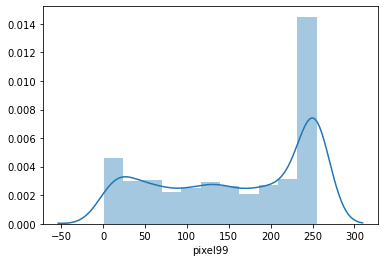

In [146]:
sns.distplot(p99['pixel99'])

### Clean Dataset
The dataset is large but relatively simple so cleaning should be straight-forward.
- Look for NaNs and outliers
- Check dtypes

In [147]:
len_train = train.shape[0]
len_test = test.shape[0]
all_y_train = train['label']
train.drop('label', axis=1, inplace=True)

In [148]:
data = pd.concat((train, test), sort=False)
data.shape

(70000, 784)

In [149]:
pd.DataFrame({'Percent Missing':(data.isnull().sum()/len(data)*100).sort_values(ascending=False)}).head(5)

,Percent Missing
pixel783,0.0
pixel268,0.0
pixel266,0.0
pixel265,0.0
pixel264,0.0


In [150]:
max_vals = []
for c in data.columns:
    max_vals.append(data[c].max())
max_vals = pd.DataFrame(max_vals, columns=['Maximum Value'])
max_vals.describe()

,Maximum Value
count,784.000000
mean,220.459184
std,80.631533
min,0.000000
25%,255.000000
50%,255.000000
75%,255.000000
max,255.000000


In [151]:
min_vals = []
for c in data.columns:
    min_vals.append(data[c].min())
min_vals = pd.DataFrame(min_vals, columns=['Minimum Value'])
min_vals.describe()

,Minimum Value
count,784.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [152]:
non_ints = 0
for d in data.dtypes:
    if d != 'int64':
        non_ints += 1
non_ints

0

In [153]:
all_x_train = data[:len_train]
all_x_test = data[len_train:]

### Visualization
Each image (row) has 784 pixels (columns) i.e. a 28x28 grid. We can visualize the data using plt.imshow().

Text(0.5, 1.0, '9')

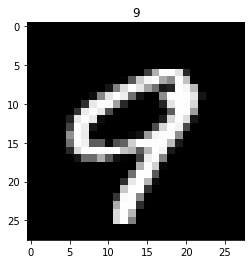

In [154]:
img = all_x_train.iloc[100].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(y_train[100])

# Part 2:
Our second goal is to build an accurate classification model for the dataset.

### Libraries

In [156]:
import matplotlib.image as mpimg

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

### Support Vector Machine
We start with a relatively basic supervised learning classification algorithm, SVM. There are several steps involved in building and testing this model.
- Scale data (mean = 0, variance = 1)
- Train, Test split from 'train' set
- Build and fit model
- Test model accuracy